# Honors Thesis: Progress Report Two

### Will Rodman | Department of Computer Science | November 30th, 2023

## 1.1: Current Progress 

Since the initial progress report I have: completed writing supporting Python classes necessary to test the Traversal Distance, collected two datasets that will be used as test data, and run the Traversal Distance on a sample of each dataset. 

The two new test datasets include: 
- Labeled Plant leafs stored as CSV files.
- Labeled English characters stored as JSON files.

The new classes added to the ```.TraversalDistance``` library include: 
- ```BinarySearch```: Uses binary search to find the min epsilon of the Traversal Distance. 
- ```Visualize```: Plots both geometric graphs, then highlights cells where free space exists. 
- ```DistanceMatrix```: Computes a distance matrix, using thr Traversal Distance as measurement, given two sets of geometric graphs. 

## 1.2: Current Proposal 

After conducting the Traversal Distance analysis on a data sample, I have observed the potential for classifying geometric graphs. My current proposal aims to use the Traversal Distance in calculating a distance matrix for a collection of geometric graph pairs. Distance matrices are a crucial computational step in machine learning clustering. 

This is feasible due to various properties of the Traversal Distance. Firstly, the Traversal Distance exhibits asymmetry, and a distance matrix does not require symmetry. Secondly, we establish that the Traversal Distance between two identical geometric graphs is zero, thereby assigning the identity of the distance matrix as zero.

Although the Traversal Distance has not been used in a asymmetric distance matrix before, other asymmetric measures have been used in distance matrices for machine learning clustering. One notable example is The jaccard distance. The jaccard distance is a measure of dissimilarity between two sets. It is defined as the size of the symmetric difference of the sets divided by the size of their union.

$J(A, B)$ between sets $A=$ and $B$ is given by:

$J(A, B) = \frac{|A \cap B|}{|A \cup B|}$

Having defined one common asymmetric distance, define a geometric graph and traversal distance as: 

$G := Geometric Graph$ 

$T_{i, j} = TraversalDistance(G_{i}, G_{j})$


Given three graphs $G_{1}, G_{2}, G_{3}$, the proposed the  traversal distance matrix is:

$
Distance Matrix
 = \begin{bmatrix} 
    T_{1, 1} & T_{1, 2} & T_{1, 3} \\
    T_{2, 1} & T_{2, 2} & T_{2, 3} \\
    T_{3, 1} & T_{3, 2} & T_{3, 3} \\
\end{bmatrix}
$

where $T_{i, j} \neq\ T_{j, i}$ and $T_{i, i} = 0$

## 1.3 Next Steps

My immediate next step is to compute the Traversal Distance matrix across multiple examples of the dataset. Since both datasets consist of geometric graphs with labeled classifications, I will integrate these classifications into the Traversal Distance matrix.

With these examples, my further plan is to select a machine learning model, such as K-Means Classification from ```SciKitLearn```. I aim to use this the classification model as my hypothesis test such that, given two geometric graphs as input, the model will be sufficient in predicting whether the geometric graphs classes are equal or not.

In [1]:
# 3rd party library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import chain
from scipy import stats
import os
import json

# local library
from TraversalDistance.Graph import Graph
from TraversalDistance.FreeSpaceGraph import FreeSpaceGraph
from TraversalDistance.Visualize import Visualize
from TraversalDistance.BinarySearch import BinarySearch
from TraversalDistance.DistanceMatrix import DistanceMatrix

## 2.1: Plant Leaf Dataset

The first dataset consists of plant leaved stored rows in a CSV file, with each row containing and classifying a type of plant leaf. After transforming the dataset into geometric graphs to fit the Traversal Distance, there are 574 plant leaves and 38 species. 

In [2]:
df = pd.read_csv('leaf_data/maracuya.csv')
df = df.drop(columns=['plant', 'ontogeny', 'total'])

# divide species into seven classes based on the paper
# https://academic.oup.com/gigascience/article/6/1/giw008/2865207?login=true#supplementary-data
species_classes = {'miniata':6,
    'amethystina':3,
    'alata':5,
    'rubra':1,
    'misera':0,
    'setacea':2,
    'triloba':4,
    'nitida':5,
    'actinia':4,
    'villosa':5,
    'micropetala':1,
    'mucronata':6,
    'maliformis':6,
    'miersii':4,
    'malacophylla':6,
    'gibertii':2,
    'mollissima':2,
    'caerulea':2,
    'gracilis':3,
    'foetida':3,
    'racemosa':5,
    'tenuifila':2,
    'cristalina':6,
    'ligularis':5,
    'cincinnata':2,
    'coccinea':6,
    'hatschbachii':2,
    'morifolia':3,
    'organensis':1,
    'capsularis':1,
    'edmundoi':2,
    'galbana':6,
    'tricuspis':1,
    'pohlii':1,
    'biflora':1,
    'sidifolia':4,
    'suberosa':2,
    'edulis':5,
    'coriacea':0,
    'kermesina':2}

# replace species names with class in dataset
df['species_classes'] = df['species'].map(species_classes)

# dropping outlying heteroblasty values
lower_bound = df['heteroblasty'].quantile(0.75)
upper_bound = df['heteroblasty'].quantile(0.90)
df = df[(df['heteroblasty'] >= lower_bound) & (df['heteroblasty'] <= upper_bound)]

# printing dataframe head
print("Shape:", df.shape)
print("Species count:", len(df['species'].value_counts()))
df.head()

Shape: (574, 33)
Species count: 38


,species,heteroblasty,x1,y1,x2,y2,x3,y3,x4,y4,...,y11,x12,y12,x13,y13,x14,y14,x15,y15,species_classes
2,actinia,15,-43.242816,430.053913,-39.277936,409.976781,-34.239161,376.468073,4.770596,377.631881,...,-1462.301694,546.694706,-517.910591,557.727421,-406.283139,488.911001,155.339518,460.348932,210.137903,4
3,actinia,14,-36.082509,416.832663,-30.527203,394.236217,-19.829324,359.869763,13.246641,361.064598,...,-1385.313503,535.019483,-519.980964,617.977373,-346.868643,517.511348,207.452944,483.026127,261.141674,4
4,actinia,13,-7.724386,362.852233,-18.024917,347.266408,-16.965580,316.096657,18.166718,313.986527,...,-1493.947554,572.248040,-473.575088,591.964194,-391.158971,440.811250,275.545461,392.206108,308.648330,4
5,actinia,12,-16.055860,392.188151,-19.701117,368.256849,-9.515832,342.898888,27.067663,356.380453,...,-1424.586489,583.337495,-406.982599,603.598228,-307.765333,556.231575,146.518317,536.364320,211.098302,4
17,actinia,14,-44.918266,393.241955,-56.996588,374.975493,-26.231109,360.611771,28.656493,325.944374,...,-1544.337476,581.284358,-403.004684,599.540556,-302.987351,469.789777,196.915193,426.293825,265.674601,4


In [3]:
# edges to build graph
edges = {(1, 2),
    (2, 3),
    (3, 4),
    (4, 5),
    (5, 6),
    (6, 1),
    (1, 7),
    (2, 7),
    (2, 9),
    (3, 9),
    (3, 11),
    (4, 11),
    (4, 13),
    (5, 13),
    (5, 15),
    (6, 15),
    (7, 8),
    (8, 9),
    (9, 10),
    (10, 11),
    (11, 12),
    (12, 13),
    (13, 14),
    (14, 15)
}

x_headers = [f'x{i}' for i in range(1, 16)]
y_headers = [f'y{i}' for i in range(1, 16)]

# function to convert observation into Graph object
def row_to_graph(row):
    x_row, y_row = row[x_headers], row[y_headers]     
    graph = Graph()
    graph.name = row['species']

    for i, (x_header, y_header) in enumerate(zip(x_headers, y_headers), 1):
        x, y = x_row[x_header], y_row[y_header]
        graph.addNode(i, x, y)
        
    for i, edge in enumerate(edges, 1):
        graph.connectTwoNodes(i, edge[0], edge[1])
            
    return graph

def rows_to_graphs(df, n=None):
    graphs = list() 
    if n: df = df.head(n)
    for index, row in df.iterrows():
        graph = row_to_graph(row)
        graphs.append(graph)
    return graphs

## 2.2: English Character Dataset

The second dataset consists of English characters stored as geometric graphs in JSON files, where each geometric graph is classified as a letter in the English alphabet. This dataset contains 2243 geometric graphs and 15 different classes. 

In [4]:
# function to convert observation into Graph object
def json_to_graph(json_data):    
    graph = Graph()
    graph.name = json_data['gxl']['graph'][0]['$']['id'][0]
    
    # Extract X, Y coordinates from 'node' elements.
    for node_data in json_data['gxl']['graph'][0]['node']:
        node_id = int(node_data['$']['id'][1:])
        x_coord = float(node_data['attr'][0]['float'][0])
        y_coord = float(node_data['attr'][1]['float'][0])
        graph.addNode(node_id, x_coord, y_coord)

    # Extract edges from 'edge' elements.
    for i, edge_data in enumerate(json_data['gxl']['graph'][0]['edge'], 1):
        from_node = int(edge_data['$']['from'][1:])
        to_node = int(edge_data['$']['to'][1:])
        graph.connectTwoNodes(i, from_node, to_node)
        
    return graph, graph.name

In [5]:
os.chdir('letter_data')
file_names = os.listdir("LOW")
graphs = dict()

for file_name in file_names:
    if file_name.endswith('.json'):
        try:
            json_graph = json.load(open(f"LOW/{file_name}"))
            graph, name = json_to_graph(json_graph)
            
            if name in graphs.keys():
                graphs[name].append(graph)
            else:
                graphs[name] = [graph]
                
        except Exception as error: 
            print(f"AssertionError {error}: failed to parse {file_name}.")

AssertionError 'edge': failed to parse VP1_0125.json.
AssertionError 'edge': failed to parse LP1_0103.json.
AssertionError 'gxl': failed to parse test.json.
AssertionError 'edge': failed to parse LP1_0136.json.
AssertionError 'edge': failed to parse LP1_0086.json.
AssertionError 'edge': failed to parse LP1_0068.json.
AssertionError 'edge': failed to parse VP1_0086.json.
AssertionError 'gxl': failed to parse validation.json.
AssertionError 'gxl': failed to parse train.json.
AssertionError 'edge': failed to parse IP1_0110.json.


In [6]:
print("Graph count:", sum(len(g) for g in graphs.values()))
print("Class count:", len(graphs.keys()))

print("Count by class:")
for key in graphs.keys():
    count = len(graphs[key])
    print(f"    {key}: {count}")

Graph count: 2243
Class count: 15
Count by class:
    T: 150
    A: 150
    X: 150
    H: 150
    Y: 150
    I: 149
    E: 150
    N: 150
    L: 146
    M: 150
    V: 148
    Z: 150
    F: 150
    W: 150
    K: 150


## 2.1: Computing the Traversal Distance with Binary Search


In [7]:
def print_epsilon(g1, g2):

    # comparing two identical graphs
    binary_search = BinarySearch(g1, g1, left=0, right=500, precision=0.01)
    epsilon = binary_search.search()
    print("Computing graph_1 by graph_1 (traversed) minimum epsilon:", epsilon)

    # comparing graph two and graph one
    binary_search = BinarySearch(g2, g1, left=0, right=500, precision=0.01)
    epsilon = binary_search.search()
    print("Computing graph_2 by graph_1 (traversed) minimum epsilon:", epsilon)

    # comparing graph one and graph two
    binary_search = BinarySearch(g1, g2, left=0, right=500, precision=0.01)
    epsilon = binary_search.search()
    print("Computing graph_1 by graph_2 (traversed) minimum epsilon:", epsilon)

In [8]:
# leaf dataset first two observations 
row_1, row_2 = df.iloc[0], df.iloc[1]
graph_1, graph_2 = row_to_graph(row_1), row_to_graph(row_2)

print_epsilon(graph_1, graph_2)

Computing graph_1 by graph_1 (traversed) minimum epsilon: 0.0
Computing graph_2 by graph_1 (traversed) minimum epsilon: 365.02838134765625
Computing graph_1 by graph_2 (traversed) minimum epsilon: 180.2978515625


In [9]:
# letter dataset first two observation  
graph_3, graph_4 = graphs['A'][0], graphs['A'][1]

print_epsilon(graph_3, graph_4)

Computing graph_1 by graph_1 (traversed) minimum epsilon: 0.0
Computing graph_2 by graph_1 (traversed) minimum epsilon: 0.14495849609375
Computing graph_1 by graph_2 (traversed) minimum epsilon: 0.14495849609375


## 4.1: Visualizing the Traversal Distance in 2-Dimensions


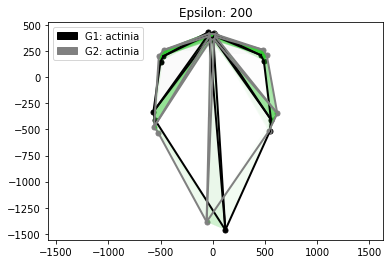

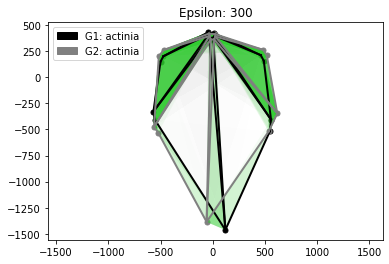

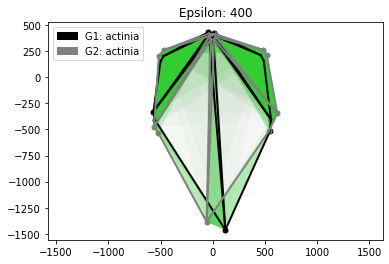

In [10]:
for epsilon in  [200, 300, 400]:
    visual = Visualize(graph_1, graph_2, epsilon=epsilon)
    visual.plot_freespace()

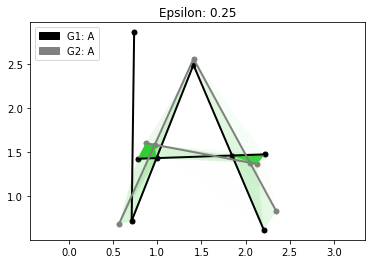

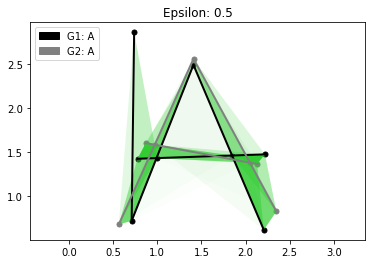

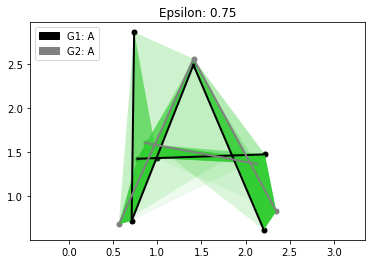

In [11]:
for epsilon in [0.25, 0.5, 0.75]:
    visual = Visualize(graph_3, graph_4, epsilon=epsilon)
    visual.plot_freespace()

## 4.2: Visualizing the Traversal Distance in 3-Dimensions


## 5.1: Computing the Traversal Distance Matrix

### Leaf Dataset

In [12]:
def scatter_plot(xy_1, xy_2, class_1, class_2):
    x_1, y_1 = zip(*xy_1)
    x_2, y_2 = zip(*xy_2)
    label_1 = f"C1: {class_1} | C2: {class_1}"
    label_2 = f"C1: {class_1} | C2: {class_2}"
    
    plt.scatter(x_1, y_1, c='blue', marker='o', label=label_1, alpha=0.5, s=15)
    plt.scatter(x_2, y_2, c='red', marker='o', label=label_2, alpha=0.5, s=15)   

    plt.title('Traversal Distances for Two Classifications')
    plt.ylabel(f'Minium Epsilon (C1 Traversed)')
    plt.xlabel(f'Minium Epsilon (C2 Traversed)')

    plt.legend()
    plt.show()

In [13]:
n = 5
class_1, class_2 = 'actinia', 'cristalina'

class_1_df = df[df['species'] == class_1]
class_1_graphs = rows_to_graphs(class_1_df, n=n)

class_2_df = df[df['species'] == class_2]
class_2_graphs = rows_to_graphs(class_2_df, n=n)

class_1_1_matrix = DistanceMatrix(class_1_graphs, class_1_graphs)
class_1_2_matrix = DistanceMatrix(class_1_graphs, class_2_graphs)

class_1_1_matrix.compute()
class_1_2_matrix.compute()

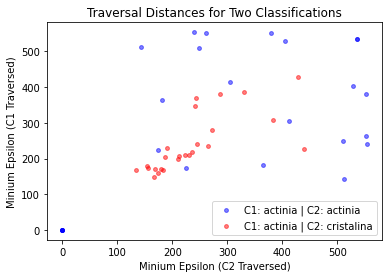

In [14]:
scatter_plot(class_1_1_matrix.to_list(), class_1_2_matrix.to_list(), class_1, class_2)

### Letter Dataset

In [15]:
n = 5
class_3, class_4 = 'T', 'Y'

class_3_graphs = graphs['A'][:n]
class_4_graphs = graphs['Y'][:n]

class_3_3_matrix = DistanceMatrix(class_3_graphs, class_3_graphs, left=0, right=5, precision=0.01)
class_3_4_matrix = DistanceMatrix(class_3_graphs, class_4_graphs, left=0, right=5, precision=0.01)

class_3_3_matrix.compute()
class_3_4_matrix.compute()

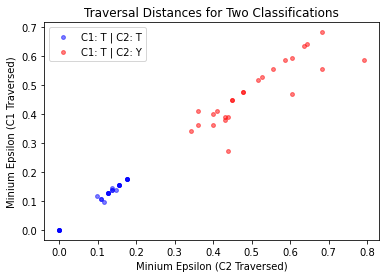

In [16]:
scatter_plot(class_3_3_matrix.to_list(), class_3_4_matrix.to_list(), class_3, class_4)